# **🤖 ML Modeling**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style="whitegrid")

In [2]:
from google.colab import files
uploaded = files.upload()

Saving cleaned_data_ml.csv to cleaned_data_ml.csv


In [3]:
df_ml = pd.read_csv('cleaned_data_ml.csv')

In [6]:
df_ml.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,TotalCharges,Churn,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,1,0,0,...,29.85,0,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,1,0,1,0,...,1889.50,0,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,1,1,0,0,...,108.15,1,0,0,0,0,0,0,0,1
3,1,0,0,0,45,0,1,0,1,1,...,1840.75,0,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,151.65,1,0,1,0,0,0,0,1,0


In [5]:
df_ml.drop('customerID', axis=1, inplace=True)

In [ ]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7032 non-null   int64  
 1   SeniorCitizen                          7032 non-null   int64  
 2   Partner                                7032 non-null   int64  
 3   Dependents                             7032 non-null   int64  
 4   tenure                                 7032 non-null   int64  
 5   PhoneService                           7032 non-null   int64  
 6   OnlineSecurity                         7032 non-null   int64  
 7   OnlineBackup                           7032 non-null   int64  
 8   DeviceProtection                       7032 non-null   int64  
 9   TechSupport                            7032 non-null   int64  
 10  StreamingTV                            7032 non-null   int64  
 11  Stre

## **Train-Test Split**

In [8]:
from sklearn.model_selection import train_test_split

X = df_ml.drop('Churn', axis=1)
y = df_ml['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)

(5625, 23) (1407, 23)


## **Scaling**

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **Logistic Regression**

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7882018479033405
Confusion Matrix:
 [[916 117]
 [181 193]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



ROC AUC Score: 0.8319157637533584


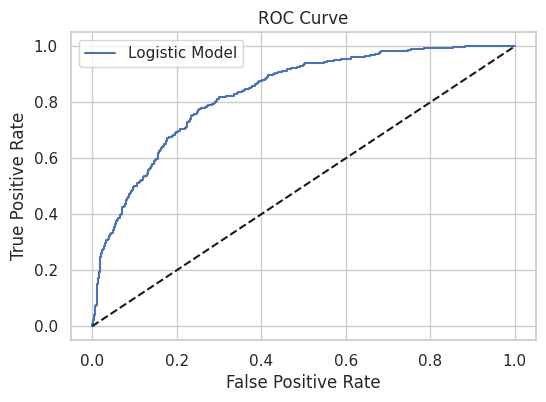

In [11]:
from sklearn.metrics import roc_auc_score, roc_curve

# Probabilities
y_probs = model.predict_proba(X_test_scaled)[:,1]

# ROC AUC
auc = roc_auc_score(y_test, y_probs)
print("ROC AUC Score:", auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label='Logistic Model')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


# **Random Forest**

In [12]:
from sklearn.ensemble import RandomForestClassifier


# Model
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predictions
rf_preds = rf_model.predict(X_test_scaled)
rf_probs = rf_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("🎯 Accuracy:", accuracy_score(y_test, rf_preds))
print("📊 Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))
print("📄 Classification Report:\n", classification_report(y_test, rf_preds))
print("📈 ROC AUC Score:", roc_auc_score(y_test, rf_probs))




🎯 Accuracy: 0.7853589196872779
📊 Confusion Matrix:
 [[935  98]
 [204 170]]
📄 Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      1033
           1       0.63      0.45      0.53       374

    accuracy                           0.79      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.77      0.79      0.77      1407

📈 ROC AUC Score: 0.8156607358247357


/tmp/ipython-input-13-1978077262.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_df.head(10), palette='viridis')


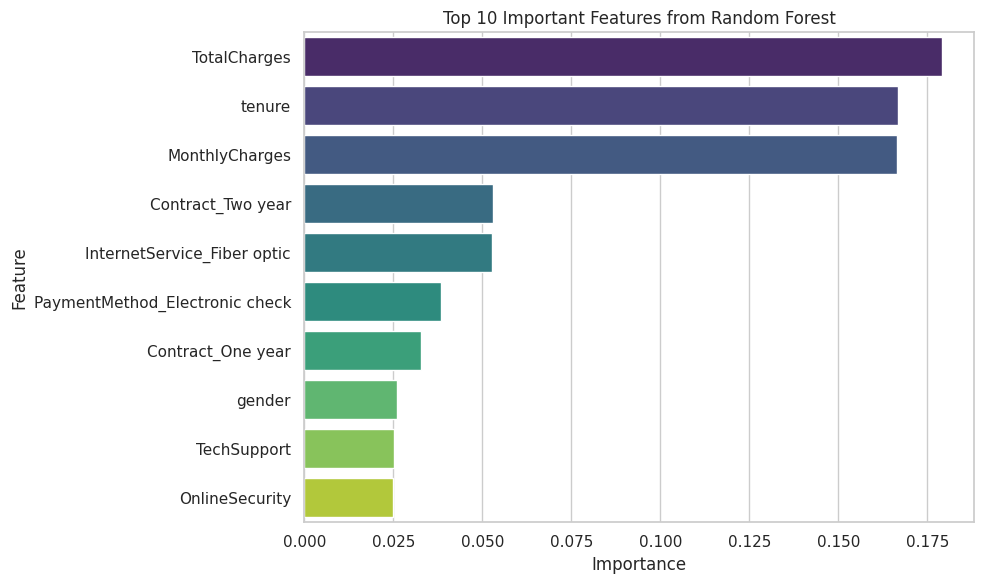

                           Feature  Importance
14                    TotalCharges    0.179168
4                           tenure    0.166836
13                  MonthlyCharges    0.166565
19               Contract_Two year    0.052926
16     InternetService_Fiber optic    0.052848
21  PaymentMethod_Electronic check    0.038307
18               Contract_One year    0.032849
0                           gender    0.025978
9                      TechSupport    0.025179
6                   OnlineSecurity    0.024995


In [13]:
# Get feature importances
importances = rf_model.feature_importances_
feature_names = X.columns

# Create DataFrame
feat_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot Top 15 Features
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_df.head(10), palette='viridis')
plt.title('Top 10 Important Features from Random Forest')
plt.tight_layout()
plt.show()

# Print table
print(feat_df.head(10))


<Axes: >

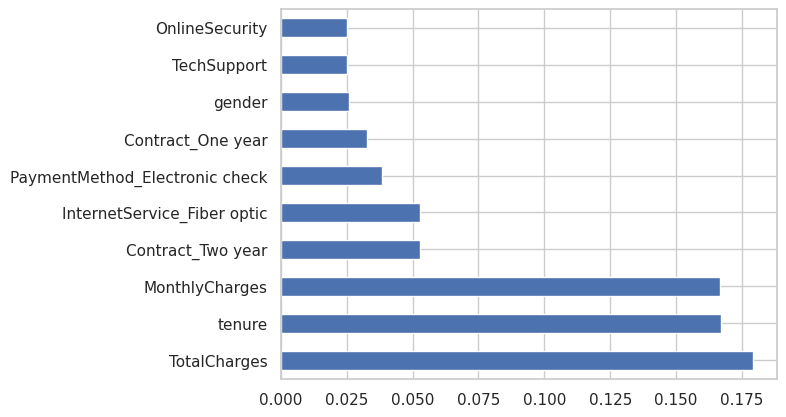

In [14]:
feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')

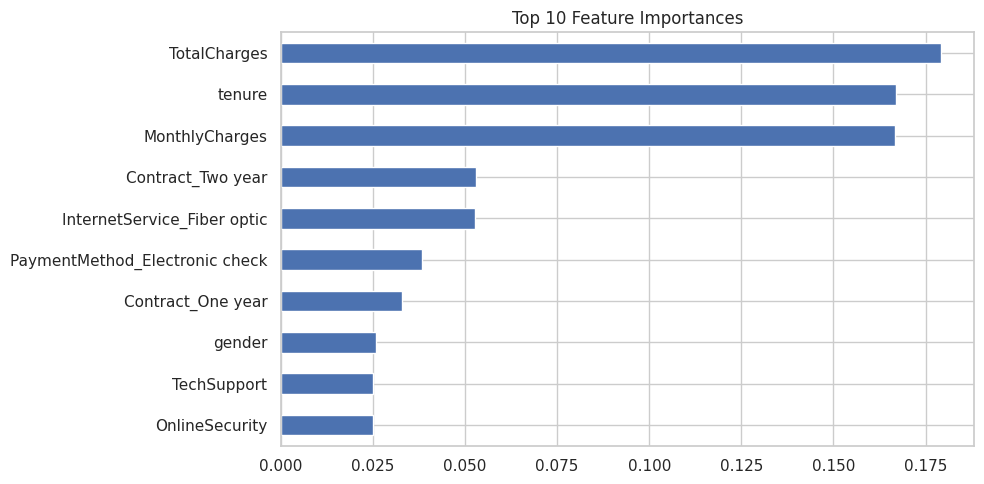

In [15]:
# Get feature importance
importances = rf_model.feature_importances_
feature_names = X.columns if hasattr(X, 'columns') else [f'Feature_{i}' for i in range(X.shape[1])]
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plot
feat_imp.head(10).plot(kind='barh', title='Top 10 Feature Importances', figsize=(10,5))
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [16]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE only on training data
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train_scaled, y_train)

# Train RF on balanced data
rf_sm_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_sm_model.fit(X_train_sm, y_train_sm)

# Predictions
y_pred_sm = rf_sm_model.predict(X_test_scaled)
y_probs_sm = rf_sm_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("🔁 Accuracy:", accuracy_score(y_test, y_pred_sm))
print("📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_sm))
print("📄 Classification Report:\n", classification_report(y_test, y_pred_sm))
print("📈 ROC AUC Score:", roc_auc_score(y_test, y_probs_sm))


🔁 Accuracy: 0.7711442786069652
📊 Confusion Matrix:
 [[866 167]
 [155 219]]
📄 Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.84      1033
           1       0.57      0.59      0.58       374

    accuracy                           0.77      1407
   macro avg       0.71      0.71      0.71      1407
weighted avg       0.77      0.77      0.77      1407

📈 ROC AUC Score: 0.8141012367280803


           <<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>

Now we will be moving to our next model for better accuracy

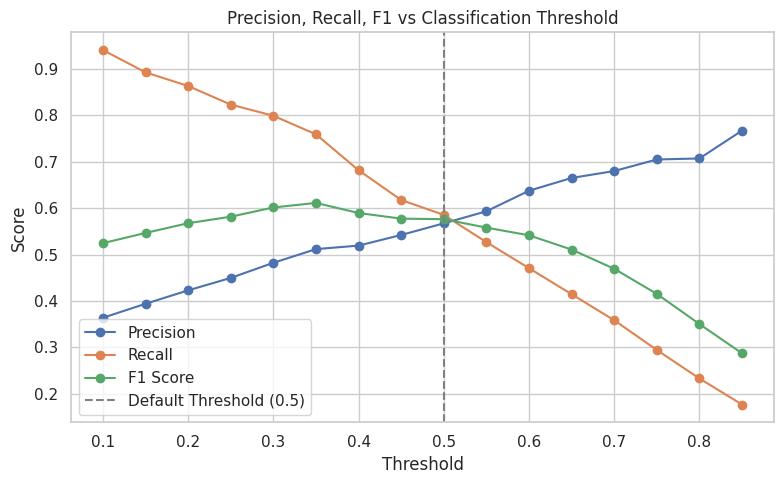

In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score

thresholds = np.arange(0.1, 0.9, 0.05)
precision_list = []
recall_list = []
f1_list = []

for t in thresholds:
    y_pred_thresh = (y_probs_sm >= t).astype(int)
    precision_list.append(precision_score(y_test, y_pred_thresh))
    recall_list.append(recall_score(y_test, y_pred_thresh))
    f1_list.append(f1_score(y_test, y_pred_thresh))

# Plot
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precision_list, label='Precision', marker='o')
plt.plot(thresholds, recall_list, label='Recall', marker='o')
plt.plot(thresholds, f1_list, label='F1 Score', marker='o')
plt.axvline(0.5, color='gray', linestyle='--', label='Default Threshold (0.5)')
plt.title('Precision, Recall, F1 vs Classification Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [19]:
# Final Threshold
final_threshold = 0.4
y_pred_final = (y_probs_sm >= final_threshold).astype(int)

# Confusion Matrix and Classification Report
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

print("📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_final))

print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred_final))

print("\n📈 ROC AUC Score:")
print(roc_auc_score(y_test, y_probs_sm))


📊 Confusion Matrix:
[[791 242]
 [115 259]]

📄 Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.77      0.82      1033
           1       0.52      0.69      0.59       374

    accuracy                           0.75      1407
   macro avg       0.70      0.73      0.70      1407
weighted avg       0.78      0.75      0.76      1407


📈 ROC AUC Score:
0.8141012367280803


### ***Threshold Tuning for Optimal Business Value***

| Metric                  | Old (Threshold=0.5) | New (Threshold=0.4) | Change       |
| ----------------------- | ------------------- | ------------------- | ------------ |
| **Accuracy**            | 77.1%               | 75.0%               | ↓ small drop |
| **Recall (class 1)**    | 0.59                | **0.69**            | ✅ Increased! |
| **Precision (class 1)** | 0.57                | 0.52                | ↓ trade-off  |
| **F1 (class 1)**        | 0.58                | **0.59**            | ✅ Improved   |
| **ROC AUC**             | 0.81                | 0.81                | ➖ Same       |


## **XGBoost Model**

In [20]:
from xgboost import XGBClassifier

# Train
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_sm, y_train_sm)

# Probabilities and Predictions
y_probs_xgb = xgb_model.predict_proba(X_test)[:, 1]
y_pred_xgb = (y_probs_xgb >= 0.4).astype(int)  # same threshold for fair comparison

# Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

print("📊 Confusion Matrix (XGBoost):")
print(confusion_matrix(y_test, y_pred_xgb))

print("\n📄 Classification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb))

print("\n📈 ROC AUC Score (XGBoost):")
print(roc_auc_score(y_test, y_probs_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:21:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📊 Confusion Matrix (XGBoost):
[[   0 1033]
 [   0  374]]

📄 Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1033
           1       0.27      1.00      0.42       374

    accuracy                           0.27      1407
   macro avg       0.13      0.50      0.21      1407
weighted avg       0.07      0.27      0.11      1407


📈 ROC AUC Score (XGBoost):
0.5441823565649089


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [24]:
from xgboost import XGBClassifier

# Train
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_sm, y_train_sm)

# Probabilities and Predictions
y_probs_xgb = xgb_model.predict_proba(X_test)[:, 1]
y_pred_xgb = (y_probs_xgb >= 0.4).astype(int)  # same threshold for fair comparison

# Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

print("📊 Confusion Matrix (XGBoost):")
print(confusion_matrix(y_test, y_pred_xgb))

print("\n📄 Classification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb))

print("\n📈 ROC AUC Score (XGBoost):")
print(roc_auc_score(y_test, y_probs_xgb))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:30:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📊 Confusion Matrix (XGBoost):
[[1023  268]
 [ 158  309]]

📄 Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1291
           1       0.54      0.66      0.59       467

    accuracy                           0.76      1758
   macro avg       0.70      0.73      0.71      1758
weighted avg       0.78      0.76      0.77      1758


📈 ROC AUC Score (XGBoost):
0.8128668744412395


🧠 Root Cause Analysis

In [21]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split before SMOTE!
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Apply SMOTE ONLY on training data
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)


In [22]:
y_train_sm = y_train_sm.astype(int)
y_test = y_test.astype(int)


In [23]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_sm, y_train_sm)

y_probs = xgb_model.predict_proba(X_test)[:, 1]
y_pred = (y_probs >= 0.5).astype(int)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_probs))


[[1068  223]
 [ 182  285]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1291
           1       0.56      0.61      0.58       467

    accuracy                           0.77      1758
   macro avg       0.71      0.72      0.71      1758
weighted avg       0.78      0.77      0.77      1758

ROC AUC: 0.8128668744412395
